<a href="https://colab.research.google.com/github/pcoiffet/pytorch_course/blob/main/pytorch_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.__version__

'2.1.0+cu118'

# Introduction to tensors


## Creating tensors

First, scalars :

In [ ]:
#Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
#Check for dim
scalar.ndim

0

In [ ]:
#Retrieve number (python integer) ? Use item() method
scalar.item()

7

Now, let's see about vectors

In [ ]:
#Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

TIPS : dim of a tensor : number of [ on the outside in one side.

In [ ]:
#Check shape of the vector
vector.shape

torch.Size([2])

Now, let's see about matrix

In [ ]:
#Matrix
MATRIX = torch.tensor([[7,8],
                        [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX.shape

torch.Size([2, 2])

How about we create a tensor ?

In [ ]:
#Tensor :
TENSOR = torch.tensor([[[1,2,3],
                        [4,5,6],
                        [2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [2, 4, 5]]])

In [ ]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [ ]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

## Random Tensors

In [ ]:
# Create a andom tensor of size (3,4)
random_tensor = torch.rand(size=(3,4))
random_tensor, random_tensor.dtype

(tensor([[0.9363, 0.1358, 0.1680, 0.2825],
         [0.9892, 0.3382, 0.3642, 0.3308],
         [0.0296, 0.6872, 0.9768, 0.6161]]),
 torch.float32)

example : typical random tensor for an image:

In [ ]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## Zeros and ones


In [ ]:
zeros = torch.zeros(size = (3,4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [ ]:
ones = torch.ones(size=(3,4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

## Creating a range and tensors like


In [ ]:
# Use torch.arange(), torch.range() is deprecated
zero_to_ten_deprecated = torch.range(0,10)

# Create a range of values 0 to 10 with a step of 2
zero_to_ten = torch.arange(0,10,2)
zero_to_ten

<ipython-input-28-3cd1fe0d0c7a>:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0,10)


tensor([0, 2, 4, 6, 8])


Sometimes you might want one tensor of a certain type with the same shape as another tensor.

In [ ]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input = zero_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0])

##Tensor datatypes


Many different tensor datatypes available in pytorch. Some are specefic for CPU, others are better for GPU...
Generally, if we see torch.cuda anywhere, the tensor is used for GPU

Most common type is torch.float32 or torch.float
Referred to 32-bit floating point

But there is also 16-bit floating point (torch.float16 or torch.half) and 64-bit floating point (torch.float64 or torch.double)

The main reason for all of this is **Precision in computing**.
Precision is the amount of detail used to describe a number

the higher the precision value (8,16,32) the more detail and hence data used to express a number.

Thi matters in deep learning and numerical computing because you're making so many operations, the moral detail you have to calculate on, the more compute you have to use.

So, lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy.

FASTER TO COMPUTE BUT LESS ACCURATE

In [ ]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

Typical errors with tensors:
- tensor shapes don't match up
- datatypes not on the same format (16 bit and 32 bit)
- tensors not on the same device (CPU/GPU)

In [ ]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

# Getting information from tensors


In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.1309, 0.7483, 0.1648, 0.0669],
        [0.5953, 0.8594, 0.2172, 0.0240],
        [0.1887, 0.8412, 0.5070, 0.8819]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


"what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where"

# Manipulating tensors (tensor operations)


In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.

These operations are often a wonderful dance between:

Addition
Substraction
Multiplication (element-wise)
Division
Matrix multiplication

### Basic operations

In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [ ]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [ ]:
# Substract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [ ]:
# Add and reasign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [ ]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [ ]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

In [ ]:
# It's more common to use * instead if torch.mul()
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


### Matrix multiplication (is all you need)


One of the most common operations in machine learning and deep learning algorithms (like neural networks) is matrix multiplication.

PyTorch implements matrix multiplication functionality in the torch.matmul() method.

The main two rules for matrix multiplication to remember are:

The inner dimensions must match:                                              
(3, 2) @ (3, 2) won't work                                                             
(2, 3) @ (3, 2) will work                                                           
(3, 2) @ (2, 3) will work                                                         
The resulting matrix has the shape of the outer dimensions:                                        
(2, 3) @ (3, 2) -> (2, 2)                                                         
(3, 2) @ (2, 3) -> (3, 3)

In [ ]:
tensor = torch.tensor([1,2,3])
tensor.shape

torch.Size([3])

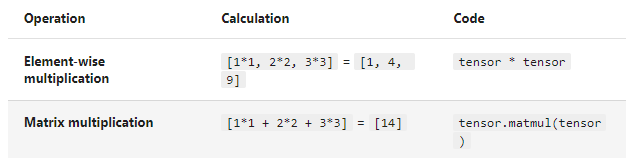

In [ ]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

In [ ]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.41 ms, sys: 0 ns, total: 1.41 ms
Wall time: 1.48 ms


tensor(14)

# One of the most common errors in deep learning (shape errors)

In [ ]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: ignored

We can transpose the matrix

In [ ]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [ ]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [ ]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])


Neural networks are full of matrix multiplications and dot products.

The torch.nn.Linear() module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input x and a weights matrix A.

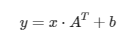

Where:

x is the input to the layer (deep learning is a stack of layers like torch.nn.Linear() and others on top of each other).

A is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "T", that's because the weights matrix gets transposed).

Note: You might also often see W or another letter like X used to showcase the weights matrix.

b is the bias term used to slightly offset the weights and inputs.

y is the output (a manipulation of the input in the hopes to discover patterns in it).

This is a linear function (you may have seen something like $y = mx+b$ in high school or elsewhere), and can be used to draw a straight line!

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

RuntimeError: ignored

### Finding the min, max, mean, sum, etc (aggregation)

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)


(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max

In [ ]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Change tensor datatype

As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in torch.float64 and another is in torch.float32, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using torch.Tensor.type(dtype=None) where the dtype parameter is the datatype you'd like to use.

First we'll create a tensor and check it's datatype (the default is torch.float32).

In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [ ]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [ ]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

### Reshaping, stacking, squeezing and unsqueezing


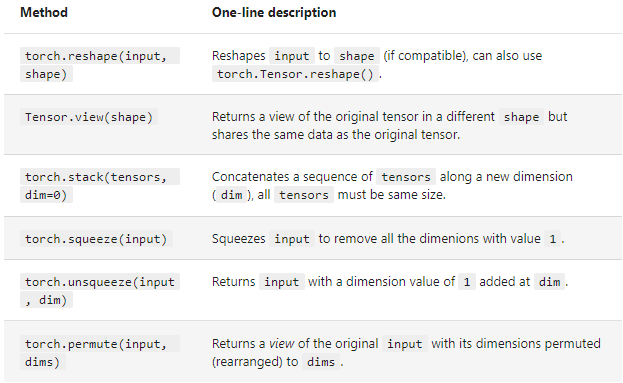

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make sure the right elements of your tensors are mixing with the right elements of other tensors.



In [ ]:
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [ ]:
# Let's add an extra dim with torch.reshape()
x_reshaped = x.reshape(1,7)
x_reshaped

tensor([[1., 2., 3., 4., 5., 6., 7.]])

We can also change de view with torch.view()

In [ ]:
# Change view (keeps same data as original but changes view)
z = x.view(1,7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

CAREFUL changing the view changes also the original tensor !!!

In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

If we wanted to stack our new tensor on top of itself five times, we could do so with torch.stack().



In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])


How about removing all single dimensions from a tensor?

To do so you can use torch.squeeze() (I remember this as squeezing the tensor to only have dimensions over 1).

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


We can also do the reverse with torch.unsqueeze()

In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])



You can also rearrange the order of axes values with torch.permute(input, dims), where the input gets turned into a view with new dims.

In [ ]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


 Because permuting returns a view (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

#Indexing (selecting data from tensors)


Sometimes you'll want to select specific data from tensors (for example, only the first column or second row).

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.

In [ ]:
# Create a tensor
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

torch.Size([9])


(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
x[0,0,:]

tensor([1, 2, 3])

# PyTorch tensors & NumPy


Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:

*   torch.from_numpy(ndarray) - NumPy array -> PyTorch tensor.
*   torch.Tensor.numpy() - PyTorch tensor -> NumPy array.




In [ ]:
# NumPy array to tensor
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

By default, NumPy arrays are created with the datatype float64 and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).

However, many PyTorch calculations default to using float32.

So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use tensor = torch.from_numpy(array).type(torch.float32).

In [ ]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

#Reproducibility (trying to take the random out of random)

In [ ]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.5745, 0.9200, 0.3230, 0.8613],
        [0.0919, 0.3102, 0.9536, 0.6002],
        [0.0351, 0.6826, 0.3743, 0.5220]])

Tensor B:
tensor([[0.1336, 0.9666, 0.9754, 0.8474],
        [0.8988, 0.1105, 0.4563, 0.9719],
        [0.3968, 0.1496, 0.4743, 0.9973]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

# Running tensors on GPUs (and making faster computations)¶


Deep learning algorithms require a lot of numerical operations.

And by default these operations are often done on a CPU (computer processing unit).

However, there's another common piece of hardware called a GPU (graphics processing unit), which is often much faster at performing the specific types of operations neural networks need (matrix multiplications) than CPUs.

### Getting a GPU

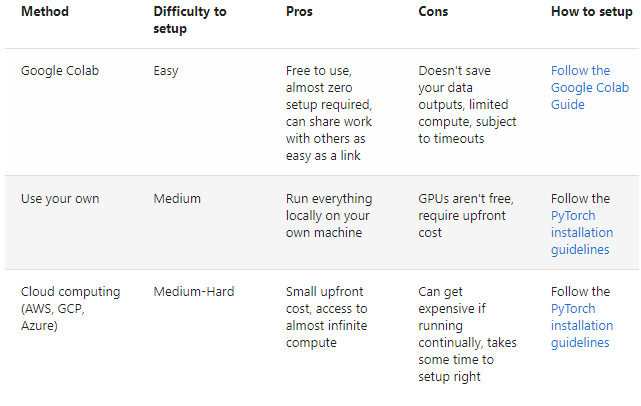

If you don't have a nvidia GPU, there are alternatives like ROCm for AMD gpus

In [ ]:
!rocminfo



/bin/bash: line 1: rocminfo: command not found


In [ ]:
import torch

# Assurez-vous que ROCm est bien installé et que PyTorch est configuré pour l'utiliser.
# Vérifiez si ROCm est disponible
if torch.backends.mps.is_available():
    # Définit le périphérique sur le GPU AMD
    device = torch.device("mps")

    # Créer un tensor et le déplacer sur le GPU AMD
    tensor = torch.tensor([1, 2, 3], device=device)

    # Effectuer des opérations sur le GPU
    tensor = tensor * tensor

    # Ramener le résultat sur le CPU si nécessaire
    tensor = tensor.to("cpu")

    print(tensor)
else:
    print("ROCm n'est pas disponible. Vérifiez votre installation.")


ROCm n'est pas disponible. Vérifiez votre installation.
